 # Clean and Analyze Employee Exit Surveys

We'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:
* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:
* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

## Exploring dataset

In [1]:
import pandas as pd
import numpy as np
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [2]:
print(dete_survey.head(3))

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   

  Role Start Date         Position Classification          Region  \
0            2004   Public Servant        A01-A04  Central Office   
1      Not Stated   Public Servant        AO5-AO7  Central Office   
2            2011  Schools Officer            NaN  Central Office   

                       Business Unit    Employment Status  ...  Kept informed  \
0  Corporate Strategy and Peformance  Permanent Full-time  ...              N   
1  Corporate Strategy and Peformance  Permanent Full-time  ...              N   
2               Education Queensland  Permanent Full-time  ...              N   

   Wellness programs  Health & Safety  Gender          Age  Aboriginal  \
0                  N                N    Ma

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

This dataset include 822 rows and 56 columns. The dataset consists of 822 rows and 56 columns, of which 6 columns have missing values ​​above 80%, 49 columns have missing values ​​below 10%, and 1 column has 367 missing values.

we will check the unique values in the dataset and save them to a new dictionary dete_counts

In [5]:
dete_counts={}
for c in dete_survey[1:].columns:
    dete_counts[c]=dete_survey[c].value_counts()
print(dete_counts)

{'ID': 823    1
270    1
280    1
279    1
278    1
      ..
546    1
545    1
544    1
543    1
1      1
Name: ID, Length: 822, dtype: int64, 'SeparationType': Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64, 'Cease Date': 2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
02/2014         2
07/2014         2
04/2014         2
08/2012         2
11/2012         1
09/2014         1
07/2012         1
2014           

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
print(tafe_survey.isnull().sum())

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


This dataset include 702 rows and 72 columns. 
we will check the unique values in the dataset and save them to a new dictionary tafe_counts

In [9]:
tafe_counts={}
for c in tafe_survey[1:].columns:
    tafe_counts[c]=tafe_survey[c].value_counts()
print(tafe_counts)

{'Record ID': 6.342194e+17    1
6.349929e+17    1
6.342081e+17    1
6.345951e+17    1
6.341719e+17    1
               ..
6.348914e+17    1
6.342080e+17    1
6.349520e+17    1
6.342684e+17    1
6.341820e+17    1
Name: Record ID, Length: 702, dtype: int64, 'Institute': Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE               1
Metropolitan South Institute of TAFE       1
Name: Institute, dtype: int64, 'WorkArea': Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64, 'CESSATION YEAR': 2011.0    268
2012.0    235
2010.0  

We can first make the following observations:

* The dete_survey dataframe contains 'Not Stated' values ​​that indicate values ​​are missing, but they aren't represented as NaN.

* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.

* Each dataframe contains many of the same columns, but the column names are different.

* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

##  Identify Missing Values and Drop Unnecessary Columns

First, we need to read Not Stated in as NaN.

In [10]:
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [11]:
colums_to_drop=tafe_survey.iloc[:,17:66]
print(colums_to_drop)

    Main Factor. Which of these was the main factor for leaving?  \
0                                                  NaN             
1                                                  NaN             
2                                                  NaN             
3                                                  NaN             
4                                                  NaN             
..                                                 ...             
697                                                NaN             
698                                                NaN             
699                                                NaN             
700                                                NaN             
701                      Career Move - Self-employment             

    InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction  \
0                                                Agree                                   

In [12]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[list(range(28, 49)) + list(range(51, 56))], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [13]:
print(dete_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [14]:
print(tafe_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

Our goal in this project is to answer two questions:

* Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The rows we removed from tafe_survey were open ended answers and the rows we removed from dete_survey were multiple choice the employee would rate their level of agreement with a given statement. None of the questions posed in the columns for either dataset would prove helpful to us in our data exploration.

Additionally, some columns in dete_survey dataset have over 80% missing values, making them unreliable for our study. These columns include: Aboriginal, Torres Strait, South Sea, Disability, and NESB. As a result, we have decided to drop these columns.

## Rename  Columns

Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:
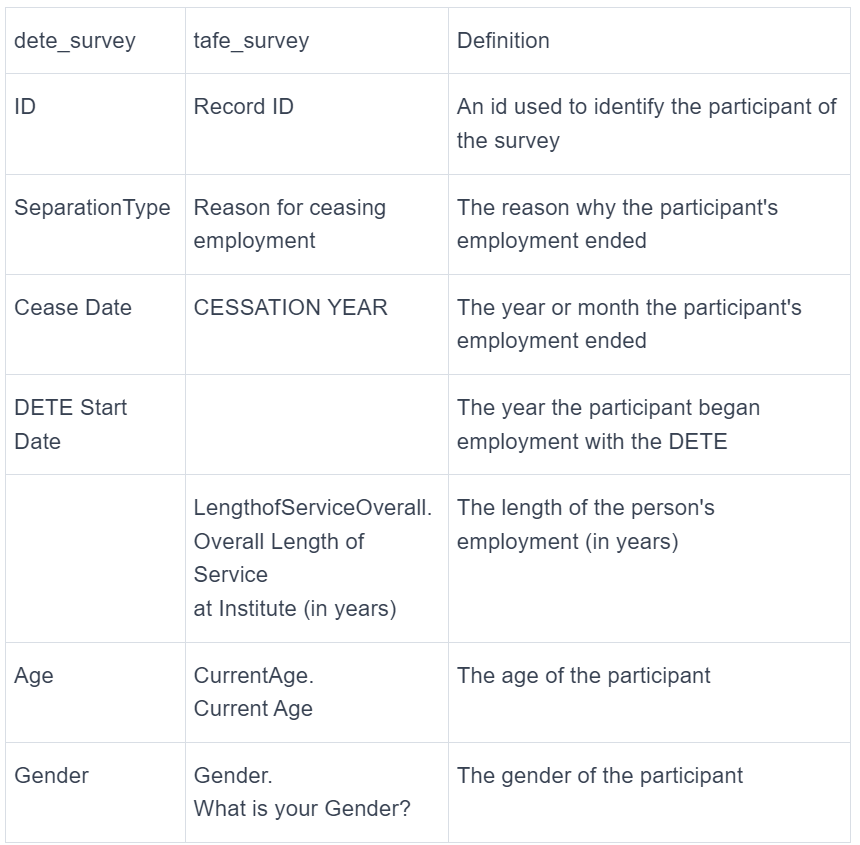

Because we eventually want to combine them, we'll have to standardize the column names

In [15]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [16]:
tafe_name_change={
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(tafe_name_change,axis=1, inplace=True)

In [17]:
dete_survey_updated.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,False,False,False,True,Male,56-60


In [18]:
tafe_survey_updated.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


## Filter the Data

To answer the question:"Are younger employees resigning due to some kind of dissatisfaction? What about older employees?",  we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'

In [19]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [21]:
resignation = dete_survey_updated['separationtype'].str.contains('Resignation', na=False)
dete_resignations = dete_survey_updated[resignation].copy()
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [22]:
resignation = tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)
tafe_resignations = tafe_survey_updated[resignation].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

 ## Verify the quality of our data

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.

In [23]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [24]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [25]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str[-4:]
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [26]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [27]:
dete_resignations['age'].value_counts().sort_values()

20 or younger     1
61 or older      23
56-60            26
31-35            29
21-25            29
51-55            32
26-30            35
36-40            41
46-50            42
41-45            48
Name: age, dtype: int64

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

## Create a new institute_service column

To answer the question: "Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?", we need to calculate the length of time an employee spent in the workplace. 

In the Human Resources field, this length of time is referred to as their years of service. The tafe_resignations DataFrame already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll need to create a corresponding institute_service column in dete_resignations.

In [28]:
dete_resignations['institute_service'] = (dete_resignations['cease_date'].astype(float) - 
                                          dete_resignations['dete_start_date'])
print(dete_resignations['institute_service'].value_counts())


5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64


In [29]:
print(tafe_resignations['institute_service'].value_counts())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64


In [30]:
def transform_service(val):
    try:
        # Handle numeric values
        if val.isnumeric() or val.replace('.', '', 1).isdigit():
            val = float(val)
            if val >= 11:
                return "Veteran"
            elif 7 <= val < 11:
                return "Established"
            elif 3 <= val < 7:
                return "Experienced"
            else:
                return "New"
        # Handle specific string formats
        elif val in ['11-20', 'More than 20 years']:
            return "Veteran"
        elif val in ['7-10']:
            return "Established"
        elif val in ['Less than 1 year']:
            return "New"
        elif pd.isnull(val):
            return np.nan
        else:
            return "New"  # Default category for unexpected formats
    except Exception as e:
        print(f"Error processing value {val}: {e}")
        return np.nan

## Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

tafe_survey_updated:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

dete_survey_updated:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

First, we'll create the dissatisfied column in tafe_resignations dataset.

In [31]:
tafe_resignations_up=tafe_resignations.copy()

columns_to_check = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

for col in columns_to_check:
    print(tafe_resignations_up[col].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [32]:
def update_vals(val):
    if pd.isnull(val):  # Check if the value is NaN
        return np.nan
    elif val == '-':  # Check if the value is '-'
        return False
    else:  # For any other value, return True
        return True

In [33]:
tafe_resignations_up[columns_to_check] = tafe_resignations_up[columns_to_check].applymap(update_vals)

tafe_resignations_up[columns_to_check].apply(pd.value_counts,dropna=False)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
False,277,270
True,55,62
NaN,8,8


In [34]:
def check_dissatisfied(row):
    if row.isna().all():  # If all values in the row are NaN
        return np.nan
    return True in row.values  # Return True if any value in the row is True

tafe_resignations_up['dissatisfied'] = tafe_resignations_up[columns_to_check].apply(check_dissatisfied, axis=1)
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

First, we'll create the dissatisfied column in dete_resignations dataset.

In [35]:
cols_to_check_dete = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
                      'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
                      'work_location', 'employment_conditions', 'work_life_balance', 'workload']

dete_resignations_up=dete_resignations.copy()
for col in cols_to_check_dete:
    print(dete_resignations_up[col].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    278
True      33
Name: lack_of_recognition, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    284
True      27
Name: workload, dtype: int64


In [36]:
dete_resignations_up['dissatisfied'] = dete_resignations_up[cols_to_check_dete].apply(check_dissatisfied, axis=1)
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combine the Data

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [37]:
dete_resignations_up['institute']='DETE'

In [38]:
tafe_resignations_up['institute']='TAFE'

In [39]:
combined = pd.concat([tafe_resignations_up, dete_resignations_up], ignore_index=True)

In [40]:
combined.notnull().sum().sort_values()

business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
traumatic_incident                                     311
career_move_to_public_sector                           311
career_move_to_private_sector                          311
workload                                               311
none_of_the_above                                      311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    311
lack_of_job_security                                   311
work_location                                          311
employment_conditions                                  3

In [41]:
combined_updated=combined.dropna(thresh=500, axis=1)

In [42]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   cease_date         635 non-null    object 
 2   separationtype     651 non-null    object 
 3   gender             592 non-null    object 
 4   age                596 non-null    object 
 5   employment_status  597 non-null    object 
 6   position           598 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(1), object(9)
memory usage: 51.0+ KB


## Clean the Service Column

The institute_service column is tricky to clean because it currently contains values in a couple different forms. To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [43]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
22.0                   6
10.0                   6
12.0                   6
14.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
28.0                   2
26.0                   2
36.0                   2


To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [44]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

<ipython-input-44-87128c28e097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
<ipython-input-44-87128c28e097>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
9.0      14
2.0      14
8.0       8
13.0      8
15.0      7
22.0      6
14.0      6
17.0      6
12.0      6
10.0      6
18.0      5
16.0      5
23.0      4
24.0      4
21.0      3
19.0      3
32.0      3
39.0      3
30.0      2
26.0      2
36.0      2
28.0      2
25.0      2
35.0      1
38.0      1
34.0      1
33.0      1
49.0      1
41.0      1
27.0      1
42.0      1
29.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [47]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

<ipython-input-47-b7c8b2b5d8a5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [48]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [49]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

<ipython-input-49-66bf6a3c9dcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


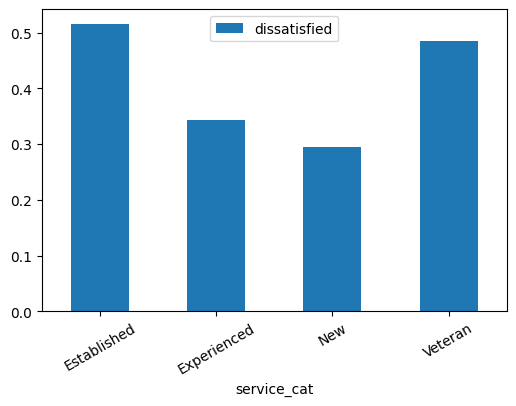

In [50]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.